# Que es Northwind ??

Northwind es básicamente una base de datos de muestra creada por Microsoft. Imagina que es como un "laboratorio de prácticas" para aprender sobre bases de datos y SQL.

En nuestro proyecto de Aprendizaje Automático (AA) para analizar las ventas, Northwind viene genial porque nos ofrece información histórica sobre las ventas de una empresa ficticia. Tenemos datos sobre qué productos se vendieron, quiénes fueron los clientes, cuándo se hicieron las compras, cuánto costaron los productos, y cosas así. Esto es oro para nosotros, ya que podemos usar estos datos para enseñar a las computadoras a predecir futuras ventas o a entender mejor cómo se comportan los clientes.

Además, Northwind también nos da detalles sobre los productos, como a qué categorías pertenecen. Esto nos ayuda a entender qué tipos de productos son más populares o cómo se están desempeñando diferentes categorías de productos en las ventas.

Por último, tenemos información sobre los clientes. Sabemos dónde están, cómo ponernos en contacto con ellos y qué compran. Esto nos da una idea de quiénes son nuestros clientes y cómo podemos llegar a ellos de la mejor manera posible.

Entonces, resumiendo, Northwind es como una mina de oro de datos para nuestro proyecto de AA. Nos da todo lo que necesitamos para entrenar a nuestras computadoras a entender y predecir las ventas, lo que nos ayuda a tomar decisiones inteligentes para nuestro negocio y a mejorar nuestras estrategias de venta.

# para ejecutar y probar el algoritmo, copie la carpeta contenedora de este notebook

<h1>El codigo originalmente está hecho localmente en jupyterlab está preparado para extraer datos de una base de datos pSQL con el siguiente codigo</h1>



```python
import psycopg2
import pandas as pd

# Conexión a la base de datos Northwind
conn = psycopg2.connect(
    dbname="NorthWind",
    user="postgres",
    password="#",
    host="localhost"
)

# Función para crear DataFrame desde la base de datos
import pandas as pd

def creador_de_df(conn, table):
    """
    Crea un DataFrame a partir de una tabla en la base de datos Northwind.

    Args:
        conn: Objeto de conexión a la base de datos.
        table (str): Nombre de la tabla en la base de datos.

    Returns:
        DataFrame: DataFrame de Pandas con los resultados de la consulta.
    """
    # Crear un cursor para ejecutar consultas
    cur = conn.cursor()
    
    # Ejecutar una consulta SQL
    cur.execute(f"SELECT * FROM {table}")
    
    # Obtener los resultados de la consulta
    results = cur.fetchall()

    # Obtener los nombres de las columnas
    column_names = [desc[0] for desc in cur.description]

    # Crear DataFrame
    df = pd.DataFrame(results, columns=column_names)

    # Cerrar el cursor
    cur.close()

    return df

# Obtener datos de ventas
df_order_details = creador_de_df(conn, "orderdetails") # de tres tablas
df_products = creador_de_df(conn, "products")
df_customers = creador_de_df(conn, "customers")
df_orders = creador_de_df(conn, "orders")
```

# como se necesita estar en un entorno local lo que hice fue guardar estos df en un archivo csv para volver a cargarlos en este entorno que es similar a una maquina virtual aislada en un servidor.

```python
# texto
# Guardar el DataFrame df_products en un archivo CSV
df_products.to_csv('products.csv')
df_orders.to_csv('orders.csv')
df_customers.to_csv('customers.csv')
df_order_details.to_csv('order_details.csv')

# index=False se utiliza para evitar que se guarde el índice del DataFrame en el archivo CSV
#pero en este caso no lo necesitamos

```

In [225]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd

# Ruta al archivo CSV en la carpeta de Google Drive
file_path = '/content/drive/My Drive/Proyecto "Custom sales analisis"/products.csv'
file_path1 = '/content/drive/My Drive/Proyecto "Custom sales analisis"/orders.csv'
file_path2 = '/content/drive/My Drive/Proyecto "Custom sales analisis"/customers.csv'
file_path3 = '/content/drive/My Drive/Proyecto "Custom sales analisis"/order_details.csv'

# Leer el archivo CSV en un DataFrame de Pandas
df_products = pd.read_csv(file_path)
df_orders = pd.read_csv(file_path1)
df_customers = pd.read_csv(file_path2)
df_order_details= pd.read_csv(file_path3)



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [226]:
df_customers.info()
print("\n")
df_order_details.info()
print("\n")
df_products.info()
print("\n")
df_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91 entries, 0 to 90
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Unnamed: 0    91 non-null     int64 
 1   customerid    91 non-null     int64 
 2   customername  91 non-null     object
 3   contactname   91 non-null     object
 4   address       91 non-null     object
 5   city          91 non-null     object
 6   postalcode    90 non-null     object
 7   country       91 non-null     object
dtypes: int64(2), object(6)
memory usage: 5.8+ KB


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 518 entries, 0 to 517
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Unnamed: 0     518 non-null    int64
 1   orderdetailid  518 non-null    int64
 2   orderid        518 non-null    int64
 3   productid      518 non-null    int64
 4   quantity       518 non-null    int64
dtypes: int64(5)
memory usag

In [227]:
#df_customers["customerid"]
df_orders

,Unnamed: 0,orderid,customerid,employeeid,orderdate,shipperid
0,0,10248,90,5,1996-07-04,3
1,1,10249,81,6,1996-07-05,1
2,2,10250,34,4,1996-07-08,2
3,3,10251,84,3,1996-07-08,1
4,4,10252,76,4,1996-07-09,2
...,...,...,...,...,...,...
191,191,10439,51,6,1997-02-07,3
192,192,10440,71,4,1997-02-10,2
193,193,10441,55,3,1997-02-10,2
194,194,10442,20,3,1997-02-11,2


## se necesita que las tablas esten relacionadas para poder usar pd.merge

In [228]:
# se necesita tablas relacionadas con claves foraneas para esta tarea

# Realizar unión de tablas para obtener información completa sobre las ventas
df_sales = pd.merge(df_order_details, df_products, on="productid", how="left") # merge significa unir, en este caso equivale a
#df_sales = pd.merge(df_sales, df_customers, on="customerid", how="left") # .. a el  lefft join clasico de psql
df_sales_timeSeries = pd.merge(df_sales, df_orders, on="orderid", how="left")
#df_sales = pd.merge(df_sales, df_customers, on="customerid", how="left")
#df_sales = pd.merge(df_sales, df_customers, on="customerid", how="left")
#no hace falta unir dos, esta manera de unir los datos es similar a los left join de las consultas SQL


In [229]:
df_sales_timeSeries.columns # en base al detalle de ordenes, unimos la tabla de productos

Index(['Unnamed: 0_x', 'orderdetailid', 'orderid', 'productid', 'quantity',
       'Unnamed: 0_y', 'productname', 'supplierid', 'categoryid', 'unit',
       'price', 'Unnamed: 0', 'customerid', 'employeeid', 'orderdate',
       'shipperid'],
      dtype='object')

In [230]:
df_sales_timeSeries['Ingresos'] = df_sales_timeSeries['quantity']*df_sales_timeSeries['price']

In [231]:
df_sales_timeSeries

,Unnamed: 0_x,orderdetailid,orderid,productid,quantity,Unnamed: 0_y,productname,supplierid,categoryid,unit,price,Unnamed: 0,customerid,employeeid,orderdate,shipperid,Ingresos
0,0,1,10248,11,12,10,Queso Cabrales,5,4,1 kg pkg.,21.00,0,90,5,1996-07-04,3,252.00
1,1,2,10248,42,10,41,Singaporean Hokkien Fried Mee,20,5,32 - 1 kg pkgs.,14.00,0,90,5,1996-07-04,3,140.00
2,2,3,10248,72,5,71,Mozzarella di Giovanni,14,4,24 - 200 g pkgs.,34.80,0,90,5,1996-07-04,3,174.00
3,3,4,10249,14,9,13,Tofu,6,7,40 - 100 g pkgs.,23.25,1,81,6,1996-07-05,1,209.25
4,4,5,10249,51,40,50,Manjimup Dried Apples,24,7,50 - 300 g pkgs.,53.00,1,81,6,1996-07-05,1,2120.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
513,513,514,10442,11,30,10,Queso Cabrales,5,4,1 kg pkg.,21.00,194,20,3,1997-02-11,2,630.00
514,514,515,10442,54,80,53,Tourtière,25,6,16 pies,7.45,194,20,3,1997-02-11,2,596.00
515,515,516,10442,66,60,65,Louisiana Hot Spiced Okra,2,2,24 - 8 oz jars,17.00,194,20,3,1997-02-11,2,1020.00
516,516,517,10443,11,6,10,Queso Cabrales,5,4,1 kg pkg.,21.00,195,66,8,1997-02-12,1,126.00


In [232]:
# Agrupar los datos por la fecha y calcular la suma de ingresos para cada fecha
daily_revenue = df_sales_timeSeries.groupby('orderdate')['Ingresos'].sum().reset_index()
daily_revenue2 = df_sales_timeSeries.groupby('orderdate')['Ingresos'].sum().reset_index()

# Mostrar el resultado
daily_revenue


,orderdate,Ingresos
0,1996-07-04,566.00
1,1996-07-05,2329.25
2,1996-07-08,3106.75
3,1996-07-09,4662.50
4,1996-07-10,1806.00
...,...,...
155,1997-02-06,710.50
156,1997-02-07,1348.70
157,1997-02-10,9441.01
158,1997-02-11,2246.00


En esta parte, estamos haciendo algunas cosas geniales con nuestros datos. Primero, estamos preparando nuestras fechas para un análisis más fácil. Convertimos la columna 'orderdate' en algo que la computadora entienda como fechas y horas, lo que nos permitirá jugar con ellas de manera más efectiva.

Después, queremos saber qué día de la semana se realizó cada pedido, así que creamos una nueva columna llamada 'day_of_week' para eso. Es más fácil para nosotros entender nuestros datos cuando podemos verlos agrupados de esta manera.

A continuación, nos aseguramos de que nuestros ingresos estén en el formato correcto. Si por casualidad hay algo raro en la columna 'Ingresos', nos aseguramos de que todo esté en números para poder hacer cálculos sin problemas.

Luego, llega la mejor: ¡la visualización! Agrupamos nuestros datos por día de la semana y calculamos cuánto dinero se generó cada día. Luego, creamos un gráfico de barras para mostrar estos ingresos totales. Así podemos ver fácilmente qué días de la semana son los más lucrativos para nuestro negocio.

¡Listo! Ahora, podemos echar un vistazo a nuestro gráfico y entender mejor cómo están yendo las cosas día a día.

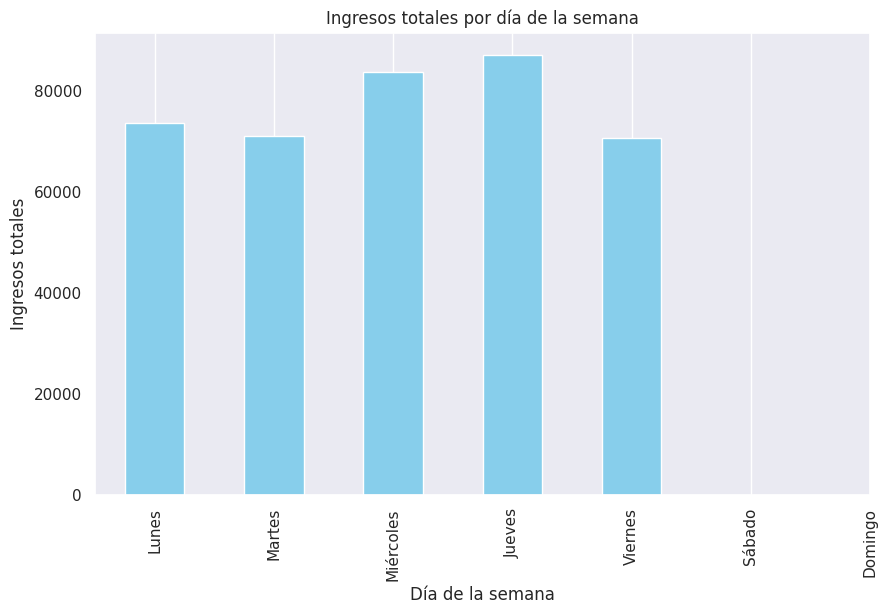

In [233]:
import pandas as pd
import matplotlib.pyplot as plt

# Convertir la columna 'orderdate' a tipo datetime
daily_revenue['orderdate'] = pd.to_datetime(daily_revenue['orderdate'])

# Agregar una columna para el día de la semana (0: lunes, 1: martes, ..., 6: domingo)
daily_revenue['day_of_week'] = daily_revenue['orderdate'].dt.dayofweek

# Convertir la columna 'Ingresos' a valores numéricos si es necesario
if not pd.api.types.is_numeric_dtype(daily_revenue['Ingresos']):
    daily_revenue['Ingresos'] = pd.to_numeric(daily_revenue['Ingresos'], errors='coerce')

# Agrupar los datos por día de la semana y calcular la suma de los ingresos
daily_income = daily_revenue.groupby('day_of_week')['Ingresos'].sum()

# Visualizar los ingresos por día de la semana
plt.figure(figsize=(10, 6))
daily_income.plot(kind='bar', color='skyblue')
plt.title('Ingresos totales por día de la semana')
plt.xlabel('Día de la semana')
plt.ylabel('Ingresos totales')
plt.xticks(range(7), ['Lunes', 'Martes', 'Miércoles', 'Jueves', 'Viernes', 'Sábado', 'Domingo'])
plt.grid(axis='y')
plt.show()


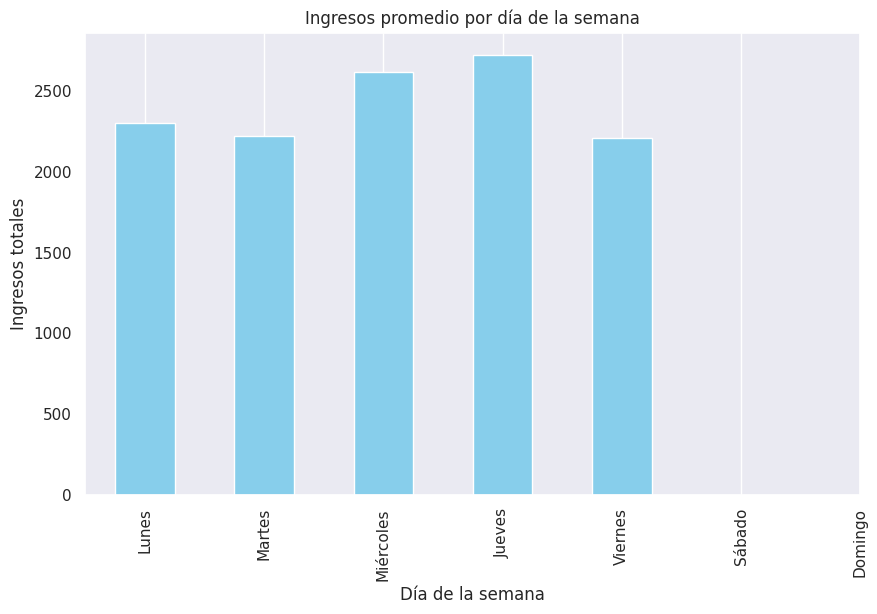

In [234]:
import pandas as pd
import matplotlib.pyplot as plt

# Convertir la columna 'orderdate' a tipo datetime
daily_revenue['orderdate'] = pd.to_datetime(daily_revenue['orderdate'])

# Agregar una columna para el día de la semana (0: lunes, 1: martes, ..., 6: domingo)
daily_revenue['day_of_week'] = daily_revenue['orderdate'].dt.dayofweek

# Convertir la columna 'Ingresos' a valores numéricos si es necesario
if not pd.api.types.is_numeric_dtype(daily_revenue['Ingresos']):
    daily_revenue['Ingresos'] = pd.to_numeric(daily_revenue['Ingresos'], errors='coerce')

# Agrupar los datos por día de la semana y calcular el promedio de los ingresos
daily_income = daily_revenue.groupby('day_of_week')['Ingresos'].mean()

# Visualizar los ingresos por día de la semana
plt.figure(figsize=(10, 6))
daily_income.plot(kind='bar', color='skyblue')
plt.title('Ingresos promedio por día de la semana')
plt.xlabel('Día de la semana')
plt.ylabel('Ingresos totales')
plt.xticks(range(7), ['Lunes', 'Martes', 'Miércoles', 'Jueves', 'Viernes', 'Sábado', 'Domingo'])
plt.grid(axis='y')
plt.show()
# asi podremos ver un patron estacional muy sencillo : que los jueves y los viernes por alguna razon, son
# los dias en los que esta empresa vende mas de sus productos basicos, recordando que 'nortwind' es un supermercado.

In [235]:
daily_revenue

,orderdate,Ingresos,day_of_week
0,1996-07-04,566.00,3
1,1996-07-05,2329.25,4
2,1996-07-08,3106.75,0
3,1996-07-09,4662.50,1
4,1996-07-10,1806.00,2
...,...,...,...
155,1997-02-06,710.50,3
156,1997-02-07,1348.70,4
157,1997-02-10,9441.01,0
158,1997-02-11,2246.00,1


### mas Ideas: ver el producto mas vendido por semana o por mes, o por dia inlcusive (ej los dias viernes se vende mas harina, salsa y demas, por tema de pizza en ese caso la empresa tiene que reforzar la cantidad de stock).

In [236]:
df_sales.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 518 entries, 0 to 517
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0_x   518 non-null    int64  
 1   orderdetailid  518 non-null    int64  
 2   orderid        518 non-null    int64  
 3   productid      518 non-null    int64  
 4   quantity       518 non-null    int64  
 5   Unnamed: 0_y   518 non-null    int64  
 6   productname    518 non-null    object 
 7   supplierid     518 non-null    int64  
 8   categoryid     518 non-null    int64  
 9   unit           518 non-null    object 
 10  price          518 non-null    float64
dtypes: float64(1), int64(8), object(2)
memory usage: 48.6+ KB


## siempre visualizamos el diagrama ERD, para verificar relaciones entre tablas y usarlas en caso de posibles JOIN

![image.png](attachment:d2bd7001-df0f-4aa5-aa3f-a6e982900298.png)

In [237]:
# ahora cntamos la cantidad de nulos

# Verificar si hay valores faltantes en el DataFrame
valores_faltantes = df_sales.isnull().sum()

# Mostrar los valores faltantes por columna
print(valores_faltantes)

# no hay nulos asi que perfecto

Unnamed: 0_x     0
orderdetailid    0
orderid          0
productid        0
quantity         0
Unnamed: 0_y     0
productname      0
supplierid       0
categoryid       0
unit             0
price            0
dtype: int64


¡Exactamente! El método `merge()` de Pandas es análogo a la operación JOIN en SQL, que se utiliza para combinar datos de dos o más tablas basándose en una columna común.

Aquí hay una comparación entre los JOIN en SQL y el `merge()` en Pandas:

- **INNER JOIN**: Retorna solo los registros que tienen una coincidencia en ambas tablas en base a la columna común.
  ```sql
  SELECT * FROM tabla1 INNER JOIN tabla2 ON tabla1.columna_comun = tabla2.columna_comun;
  ```
  ```python
  pd.merge(tabla1, tabla2, on='columna_comun', how='inner')
  ```

- **LEFT JOIN**: Retorna todos los registros de la tabla izquierda y los registros coincidentes de la tabla derecha. Si no hay coincidencia en la tabla derecha, se rellena con NaN.
  ```sql
  SELECT * FROM tabla1 LEFT JOIN tabla2 ON tabla1.columna_comun = tabla2.columna_comun;
  ```
  ```python
  pd.merge(tabla1, tabla2, on='columna_comun', how='left')
  ```

- **RIGHT JOIN**: Retorna todos los registros de la tabla derecha y los registros coincidentes de la tabla izquierda. Si no hay coincidencia en la tabla izquierda, se rellena con NaN.
  ```sql
  SELECT * FROM tabla1 RIGHT JOIN tabla2 ON tabla1.columna_comun = tabla2.columna_comun;
  ```
  ```python
  pd.merge(tabla1, tabla2, on='columna_comun', how='right')
  ```

- **FULL OUTER JOIN**: Retorna todos los registros cuando hay una coincidencia en una de las tablas. Si no hay coincidencia, se rellena con NaN.
  ```sql
  SELECT * FROM tabla1 FULL OUTER JOIN tabla2 ON tabla1.columna_comun = tabla2.columna_comun;
  ```
  ```python
  pd.merge(tabla1, tabla2, on='columna_comun', how='outer')
  ```

El método `merge()` de Pandas ofrece una gran flexibilidad para realizar operaciones de combinación de datos, al igual que las operaciones de JOIN en SQL. Puedes especificar la columna común sobre la cual se realizará la combinación (`on`), así como el tipo de combinación (`how`) que deseas realizar. Esto hace que sea fácil manipular y analizar conjuntos de datos en Python de manera similar a como lo harías en SQL.

# Ideas

Con esos conjuntos de datos de NorthWind, hay varias ideas interesantes que podrías explorar para un proyecto de ciencia de datos. Aquí te doy algunas sugerencias:

1. **Análisis de ventas por cliente**:
   - Utiliza los datos de clientes y detalles de órdenes para analizar el comportamiento de compra de diferentes clientes.
   - Puedes investigar patrones de compra, frecuencia de compra, valor promedio de las órdenes, etc.
   - Segmenta a los clientes en grupos basados en su comportamiento de compra y realiza recomendaciones de marketing específicas para cada segmento.

2. **Predicción de demanda de productos**:
   - Emplea los datos de detalles de órdenes para predecir la demanda futura de productos.
   - Utiliza técnicas de series temporales o aprendizaje automático para prever las ventas de ciertos productos en función de variables como el tiempo, el tipo de producto, etc.

3. **Análisis de productos más populares**:
   - Analiza los datos de detalles de órdenes para identificar los productos más populares en términos de cantidad vendida y/o ingresos generados.
   - Explora cómo varía la popularidad de los productos en diferentes regiones geográficas o en diferentes períodos de tiempo.

4. **Modelo de precios de productos**:
   - Utiliza los datos de productos para construir un modelo de precios de productos.
   - Puedes investigar cómo diferentes variables, como la categoría del producto o el proveedor, afectan al precio de venta.

5. **Análisis de la cadena de suministro**:
   - Utiliza datos de órdenes y productos para analizar la eficiencia de la cadena de suministro de la empresa.
   - Identifica posibles cuellos de botella en la cadena de suministro y propón mejoras.

Estas son solo algunas ideas para empezar. Puedes combinar múltiples conjuntos de datos y técnicas de análisis para crear un proyecto impresionante que muestre tus habilidades en ciencia de datos y programación en Python. ¿Alguna de estas te llama la atención o necesitas más detalles sobre alguna en particular?

In [238]:

# Análisis exploratorio de datos
# (Por ejemplo, visualización de datos, cálculo de estadísticas descriptivas)

# Análisis de ventas
# (Por ejemplo, análisis de distribución de ventas, rendimiento de productos, segmentación de clientes)

# Generación de informes y visualizaciones
# (Por ejemplo, gráficos de barras, gráficos de líneas, mapas de calor)

# Conclusiones y recomendaciones
# (Por ejemplo, acciones específicas para mejorar el rendimiento de ventas)

In [239]:
# vamos con la primer idea
"""
Análisis de ventas por cliente:
* Utiliza los datos de clientes y detalles de órdenes para analizar el comportamiento de compra de diferentes clientes.
* Puedes investigar patrones de compra, frecuencia de compra, valor promedio de las órdenes, etc.
* Segmenta a los clientes en grupos basados en su comportamiento de compra y realiza recomendaciones de marketing específicas para cada segmento.
"""




'\nAnálisis de ventas por cliente:\n* Utiliza los datos de clientes y detalles de órdenes para analizar el comportamiento de compra de diferentes clientes.\n* Puedes investigar patrones de compra, frecuencia de compra, valor promedio de las órdenes, etc.\n* Segmenta a los clientes en grupos basados en su comportamiento de compra y realiza recomendaciones de marketing específicas para cada segmento.\n'

In [240]:
# analisis de  ventas totales :

v_totales = df_sales["quantity"].sum()

#ingreso_total = df_sales["quantity"].sum() * df_sales["price"].sum()

print("La cantidad de ventas totales actuales son de",v_totales, "unidades",
     "\n El ingreso total a fecha actual es de ")

La cantidad de ventas totales actuales son de 12743 unidades 
 El ingreso total a fecha actual es de 


In [241]:
df_sales["ingreso_bruto"] = df_sales["price"]* df_sales["quantity"]
df_sales

,Unnamed: 0_x,orderdetailid,orderid,productid,quantity,Unnamed: 0_y,productname,supplierid,categoryid,unit,price,ingreso_bruto
0,0,1,10248,11,12,10,Queso Cabrales,5,4,1 kg pkg.,21.00,252.00
1,1,2,10248,42,10,41,Singaporean Hokkien Fried Mee,20,5,32 - 1 kg pkgs.,14.00,140.00
2,2,3,10248,72,5,71,Mozzarella di Giovanni,14,4,24 - 200 g pkgs.,34.80,174.00
3,3,4,10249,14,9,13,Tofu,6,7,40 - 100 g pkgs.,23.25,209.25
4,4,5,10249,51,40,50,Manjimup Dried Apples,24,7,50 - 300 g pkgs.,53.00,2120.00
...,...,...,...,...,...,...,...,...,...,...,...,...
513,513,514,10442,11,30,10,Queso Cabrales,5,4,1 kg pkg.,21.00,630.00
514,514,515,10442,54,80,53,Tourtière,25,6,16 pies,7.45,596.00
515,515,516,10442,66,60,65,Louisiana Hot Spiced Okra,2,2,24 - 8 oz jars,17.00,1020.00
516,516,517,10443,11,6,10,Queso Cabrales,5,4,1 kg pkg.,21.00,126.00


In [242]:
# Agrupar por el nombre del producto y sumar las cantidades vendidas y el ingreso bruto
ventas_por_producto = df_sales.groupby('productname').agg({'quantity': 'sum', 'ingreso_bruto': 'sum'})

print(ventas_por_producto)

"""

DataFrame: Es el DataFrame que estás procesando.
.groupby(): Se utiliza para agrupar los datos por ciertas columnas.
.agg(): Se utiliza para aplicar funciones de agregación a las columnas agrupadas.
'columna': 'funcion': Especifica la columna y la función de agregación a aplicar.

"""

                                 quantity  ingreso_bruto
productname                                             
Alice Mutton                          331       12909.00
Aniseed Syrup                          80         800.00
Boston Crab Meat                      256        4710.40
Camembert Pierrot                     430       14620.00
Carnarvon Tigers                      106        6625.00
...                                   ...            ...
Uncle Bob's Organic Dried Pears        25         750.00
Valkoinen suklaa                       70        1137.50
Vegie-spread                          209        9175.10
Wimmers gute Semmelknödel             167        5552.75
Zaanse koeken                         101         959.50

[77 rows x 2 columns]


"\n\nDataFrame: Es el DataFrame que estás procesando.\n.groupby(): Se utiliza para agrupar los datos por ciertas columnas.\n.agg(): Se utiliza para aplicar funciones de agregación a las columnas agrupadas.\n'columna': 'funcion': Especifica la columna y la función de agregación a aplicar.\n\n"

In [243]:
ventas_por_producto

,quantity,ingreso_bruto
productname,,
Alice Mutton,331,12909.00
Aniseed Syrup,80,800.00
Boston Crab Meat,256,4710.40
Camembert Pierrot,430,14620.00
Carnarvon Tigers,106,6625.00
...,...,...
Uncle Bob's Organic Dried Pears,25,750.00
Valkoinen suklaa,70,1137.50
Vegie-spread,209,9175.10


![image.png](attachment:cce3d19c-7d7d-4011-8a00-ce4918351c20.png)

In [244]:
# Ordenamos de manera ascendente y descendente:

# Ordenar por ingreso bruto en orden descendente para obtener el top 5 de productos con mayores ingresos
top_5_altos_ingresos = ventas_por_producto.sort_values(by='ingreso_bruto', ascending=False).head(5)

# Ordenar por ingreso bruto en orden ascendente para obtener el top 5 de productos con menores ingresos
top_5_bajos_ingresos = ventas_por_producto.sort_values(by='ingreso_bruto', ascending=True).head(5)

print("Top 5 de productos con mayores ingresos:")
print(top_5_altos_ingresos)

print("\nTop 5 de productos con menores ingresos: ")
print(top_5_bajos_ingresos)

Top 5 de productos con mayores ingresos:
                         quantity  ingreso_bruto
productname                                     
Côte de Blaye                 239       62976.50
Thüringer Rostbratwurst       168       20796.72
Raclette Courdavault          346       19030.00
Tarte au sucre                325       16022.50
Camembert Pierrot             430       14620.00

Top 5 de productos con menores ingresos: 
                           quantity  ingreso_bruto
productname                                       
Laughing Lumberjack Lager         5           70.0
Røgede sild                      15          142.5
Filo Mix                         48          336.0
Gustaf's Knäckebröd              18          378.0
Genen Shouyu                     25          387.5


In [245]:
top_5_altos_ingresos

,quantity,ingreso_bruto
productname,,
Côte de Blaye,239,62976.50
Thüringer Rostbratwurst,168,20796.72
Raclette Courdavault,346,19030.00
Tarte au sucre,325,16022.50
Camembert Pierrot,430,14620.00


Primero, configuramos el estilo de Seaborn para que nuestros gráficos se vean geniales y claros.

Luego, creamos una figura de Matplotlib para nuestra visualización. Queremos hacer un histograma de barras horizontales para ver cuáles son los productos que nos están dando los mayores ingresos.

Utilizamos Seaborn para trazar este histograma. Específicamente, estamos utilizando un gráfico de barras horizontales para comparar los ingresos brutos de nuestros productos principales. ¡El color azul nos ayuda a destacar los datos de manera efectiva!

Después de eso, añadimos un título a nuestro gráfico para darle contexto y etiquetas informativas a los ejes para que sepamos qué estamos viendo.

Y aquí viene un detalle interesante: modificamos las etiquetas del eje x para agregar "$" al final, ya que estamos hablando de ingresos en dólares. Además, las rotamos un poco para que sean más legibles.

¡Y voilà! Mostramos nuestro gráfico para que podamos ver fácilmente cuáles son los productos que están impulsando nuestros ingresos.

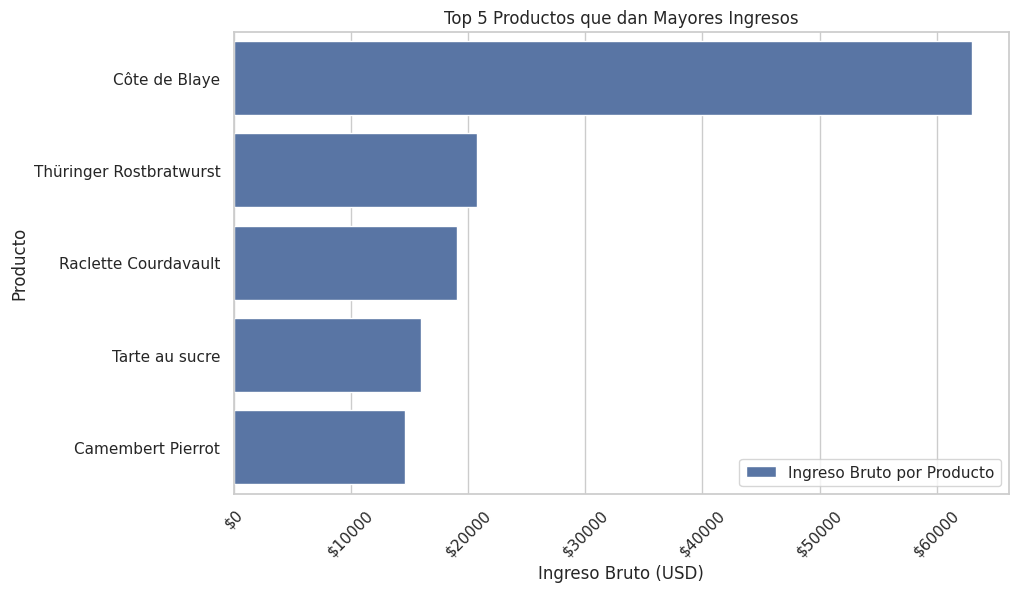

In [246]:
import seaborn as sns
import matplotlib.pyplot as plt

# Establecer el estilo de Seaborn
sns.set_theme(style="whitegrid")

# Inicializar la figura de matplotlib
f, ax = plt.subplots(figsize=(10, 6))

# Graficar el histograma de barras horizontales
sns.barplot(x="ingreso_bruto", y="productname", data=top_5_altos_ingresos,
            label="Ingreso Bruto por Producto", color="b")

# Agregar título y etiquetas informativas de los ejes
plt.title("Top 5 Productos que dan Mayores Ingresos")
plt.xlabel("Ingreso Bruto (USD)")
plt.ylabel("Producto")

# Modificar las etiquetas del eje x para agregar "USD" al final
plt.xticks(rotation=45)  # Rotar las etiquetas para mayor legibilidad
plt.gca().xaxis.set_major_formatter('${:.0f}'.format)  # Agregar el formato de dólares

# Mostrar la gráfica
plt.show()


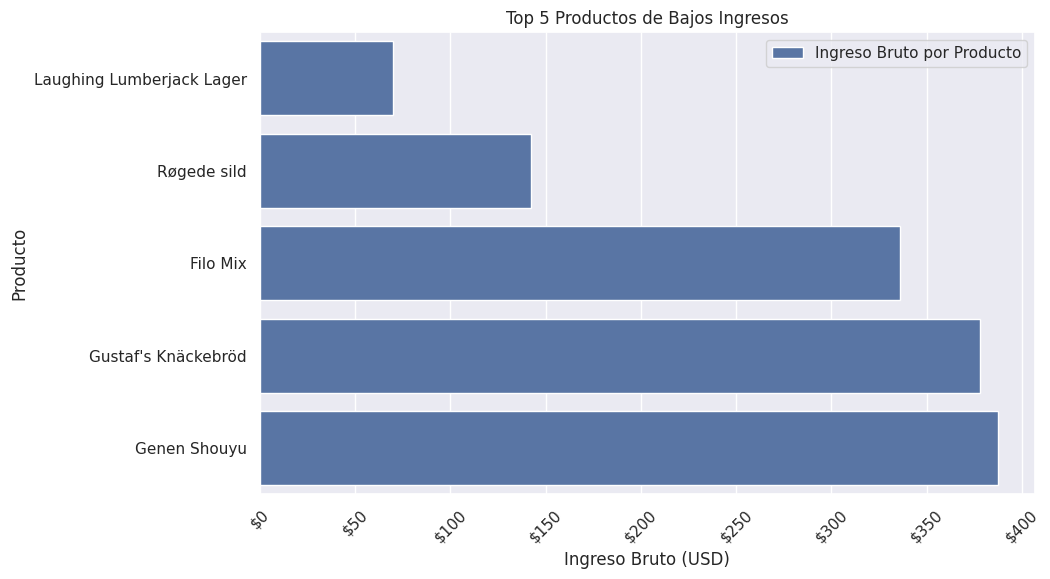

In [247]:
import seaborn as sns
import matplotlib.pyplot as plt

# Establecer el estilo de Seaborn
sns.set_theme(style="darkgrid")

# Inicializar la figura de matplotlib
f, ax = plt.subplots(figsize=(10, 6))

# Graficar el histograma de barras horizontales
sns.barplot(x="ingreso_bruto", y="productname", data=top_5_bajos_ingresos,
            label="Ingreso Bruto por Producto", color="b")

# Agregar título y etiquetas informativas de los ejes
plt.title("Top 5 Productos de Bajos Ingresos")
plt.xlabel("Ingreso Bruto (USD)")
plt.ylabel("Producto")

# Modificar las etiquetas del eje x para agregar "USD" al final
plt.xticks(rotation=45)  # Rotar las etiquetas para mayor legibilidad
plt.gca().xaxis.set_major_formatter('${:.0f}'.format)  # Agregar el formato de dólares

# Mostrar la gráfica
plt.show()


Con un conjunto de datos como el que proporcionaste, puedes realizar varios análisis para obtener información valiosa sobre tus ventas. Aquí hay algunas ideas de análisis que podrías realizar en base al DataFrame `df_sales`:

1. **Análisis de Ventas Totales:**
   - Suma la columna de `quantity` para obtener el total de productos vendidos.
   - Calcula el ingreso total multiplicando `quantity` por `price` y sumando los resultados.

2. **Análisis de Productos Más Vendidos:**
   - Identifica los productos más vendidos examinando la columna `productname` y sumando las cantidades vendidas.
   - Visualiza los productos más vendidos con un gráfico de barras o un gráfico de pastel.

3. **Análisis por Categoría:**
   - Agrupa los datos por la columna `categoryid` y calcula las sumas o promedios de las cantidades vendidas y los ingresos generados por categoría.

4. **Análisis de Precios:**
   - Calcula estadísticas descriptivas para la columna `price`, como el precio promedio, la mediana, el mínimo y el máximo.
   - Visualiza la distribución de los precios con un histograma.

5. **Análisis de Proveedores:**
   - Examina la columna `supplierid` para identificar los proveedores más frecuentes o aquellos que generan más ingresos.

6. **Tendencias Temporales:**
   - Si hay información de fechas en tu conjunto de datos, podrías realizar análisis de tendencias temporales, como las ventas mensuales o anuales.

7. **Correlaciones entre Variables:**
   - Explora posibles correlaciones entre las variables, como la cantidad vendida y el precio, utilizando gráficos de dispersión o cálculos de correlación.

8. **Análisis Geográfico:**
   - Si tienes información sobre la ubicación geográfica, podrías explorar patrones de ventas por ubicación.

Estas son solo algunas ideas generales. El análisis específico dependerá de tus objetivos y de la información disponible en tu conjunto de datos. Puedes utilizar herramientas como pandas, NumPy y Matplotlib/Seaborn para realizar estos análisis y visualizaciones en Python.

In [248]:
#vamos con # **Análisis por Categoría:** #

# REFERENCIA : "cuales son las categorias de productos que en promedoi mas ganancias y perdidas generan "

#cuales son los productos que mas se venden, y en promedio cuales son los productos que masd inero nos deja


# Agrupar los datos por la columna "categoryid" y calcular los promedios de las cantidades vendidas y los ingresos generados por categoría
promedio_por_categoria = df_sales.groupby('categoryid').agg({'quantity': 'mean', 'ingreso_bruto': 'mean'})

print(promedio_por_categoria)

             quantity  ingreso_bruto
categoryid                          
1           24.612903    1069.510753
2           28.224490     715.746939
3           25.119048     653.680476
4           26.010000     699.210000
5           21.714286     531.613095
6           25.760000    1033.530400
7           21.666667     709.133333
8           21.567164     442.571642


In [249]:
promedio_por_categoria

,quantity,ingreso_bruto
categoryid,,
1,24.612903,1069.510753
2,28.224490,715.746939
3,25.119048,653.680476
4,26.010000,699.210000
5,21.714286,531.613095
6,25.760000,1033.530400
7,21.666667,709.133333
8,21.567164,442.571642


In [250]:
# ordenamos

# Ordenar por ingreso bruto en orden descendente para obtener el top 5 de productos con mayores ingresos
top_3_prom_ingresos_altos = promedio_por_categoria.sort_values(by='ingreso_bruto', ascending=False).head(3) # descendente o sea de mayor a menor
top_3_prom_quantity_altos = promedio_por_categoria.sort_values(by='quantity', ascending=False).head(3)

# Ordenar por ingreso bruto en orden ascendente para obtener el top 5 de productos con menores ingresos
top_3_prom_ingresos_bajos = promedio_por_categoria.sort_values(by='ingreso_bruto', ascending=True).head(3) # descendente o sea de mayor a menor
top_3_prom_quantity_bajos = promedio_por_categoria.sort_values(by='quantity', ascending=True).head(3)

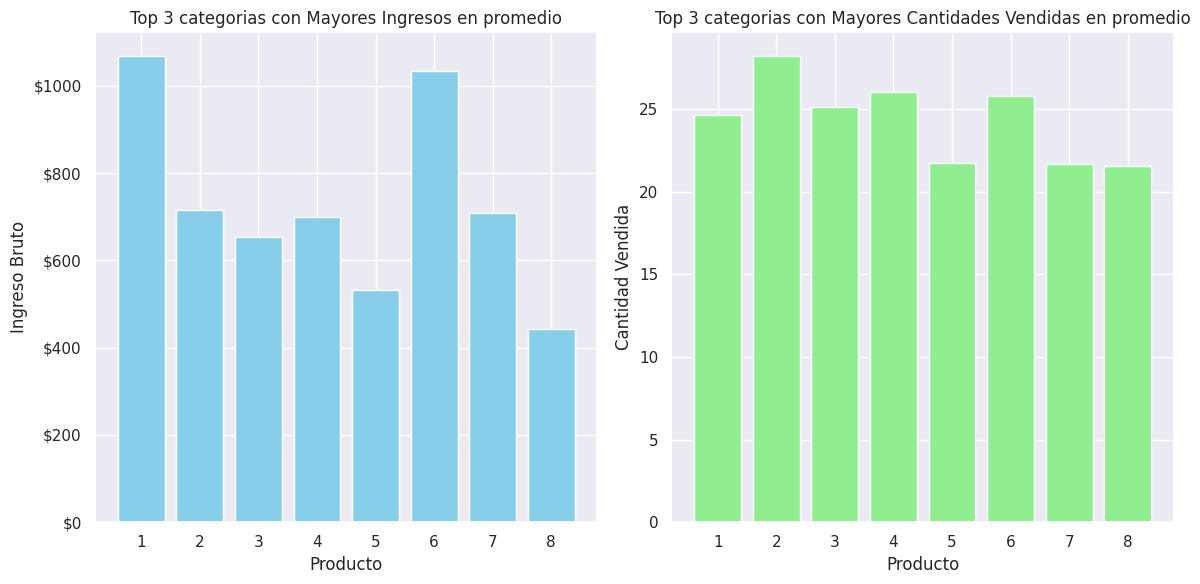

In [251]:
# ordenamos

# Ordenar por ingreso bruto en orden descendente para obtener el top 5 de productos con mayores ingresos
top_3_prom_ingresos_altos = promedio_por_categoria.sort_values(by='ingreso_bruto', ascending=False) # descendente o sea de mayor a menor
top_3_prom_quantity_altos = promedio_por_categoria.sort_values(by='quantity', ascending=False)

# Ordenar por ingreso bruto en orden ascendente para obtener el top 5 de productos con menores ingresos
top_3_prom_ingresos_bajos = promedio_por_categoria.sort_values(by='ingreso_bruto', ascending=True) # descendente o sea de mayor a menor
top_3_prom_quantity_bajos = promedio_por_categoria.sort_values(by='quantity', ascending=True)

import seaborn as sns
import matplotlib.pyplot as plt

# Crear subplots para mostrar dos gráficos uno al lado del otro
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

# Gráfico de barras para los top 3 de productos con mayores ingresos
axes[0].bar(top_3_prom_ingresos_altos.index, top_3_prom_ingresos_altos['ingreso_bruto'], color='skyblue')
axes[0].set_title('Top 3 categorias con Mayores Ingresos en promedio')
axes[0].set_xlabel('Producto')
axes[0].set_ylabel('Ingreso Bruto')
axes[0].get_yaxis().set_major_formatter('${:.0f}'.format)  # Agregar el formato de dólares

# Gráfico de barras para los top 3 de productos con mayores cantidades vendidas
axes[1].bar(top_3_prom_quantity_altos.index, top_3_prom_quantity_altos['quantity'], color='lightgreen')
axes[1].set_title('Top 3 categorias con Mayores Cantidades Vendidas en promedio')
axes[1].set_xlabel('Producto')
axes[1].set_ylabel('Cantidad Vendida')

# Ajustar el diseño de los subplots
plt.tight_layout()

# Mostrar los gráficos
plt.show()


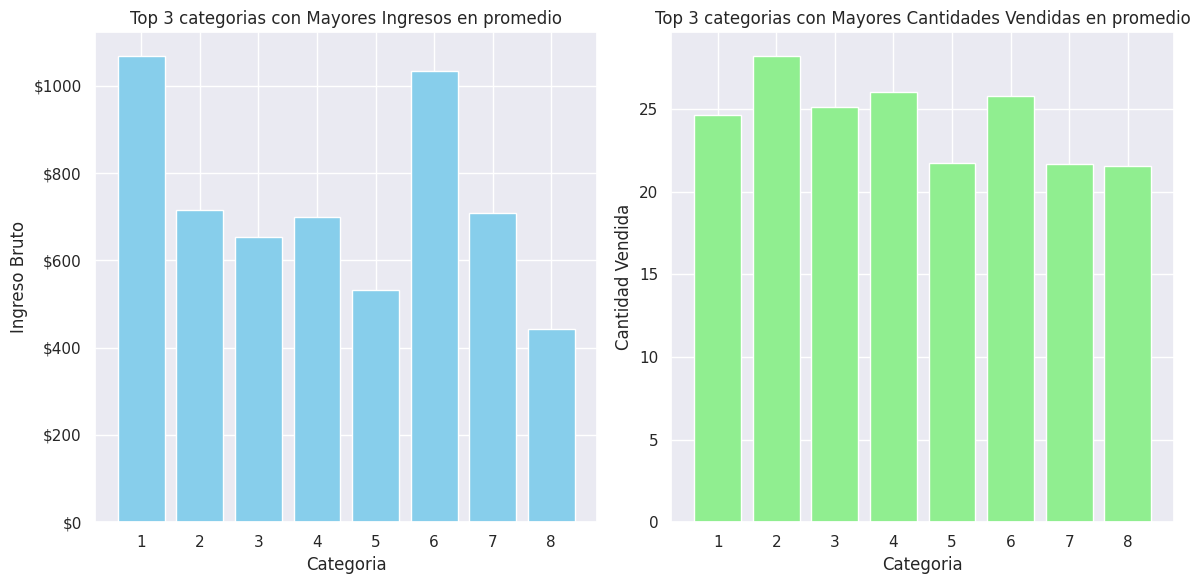

In [252]:
# para solucionar esto

import seaborn as sns
import matplotlib.pyplot as plt

# Extraer los índices de los top 3 de productos con mayores ingresos y cantidades vendidas
indices_ingresos_altos = top_3_prom_ingresos_altos.index
indices_quantity_altos = top_3_prom_quantity_altos.index

# Crear subplots para mostrar dos gráficos uno al lado del otro
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

# Gráfico de barras para los top 3 de productos con mayores ingresos
axes[0].bar(indices_ingresos_altos, top_3_prom_ingresos_altos['ingreso_bruto'], color='skyblue')
axes[0].set_title('Top 3 categorias con Mayores Ingresos en promedio')
axes[0].set_xlabel('Categoria')
axes[0].set_ylabel('Ingreso Bruto')
axes[0].get_yaxis().set_major_formatter('${:.0f}'.format)  # Agregar el formato de dólares

# Gráfico de barras para los top 3 de productos con mayores cantidades vendidas
axes[1].bar(indices_quantity_altos, top_3_prom_quantity_altos['quantity'], color='lightgreen')
axes[1].set_title('Top 3 categorias con Mayores Cantidades Vendidas en promedio')
axes[1].set_xlabel('Categoria')
axes[1].set_ylabel('Cantidad Vendida')

# Ajustar el diseño de los subplots
plt.tight_layout()

# Mostrar los gráficos
plt.show()


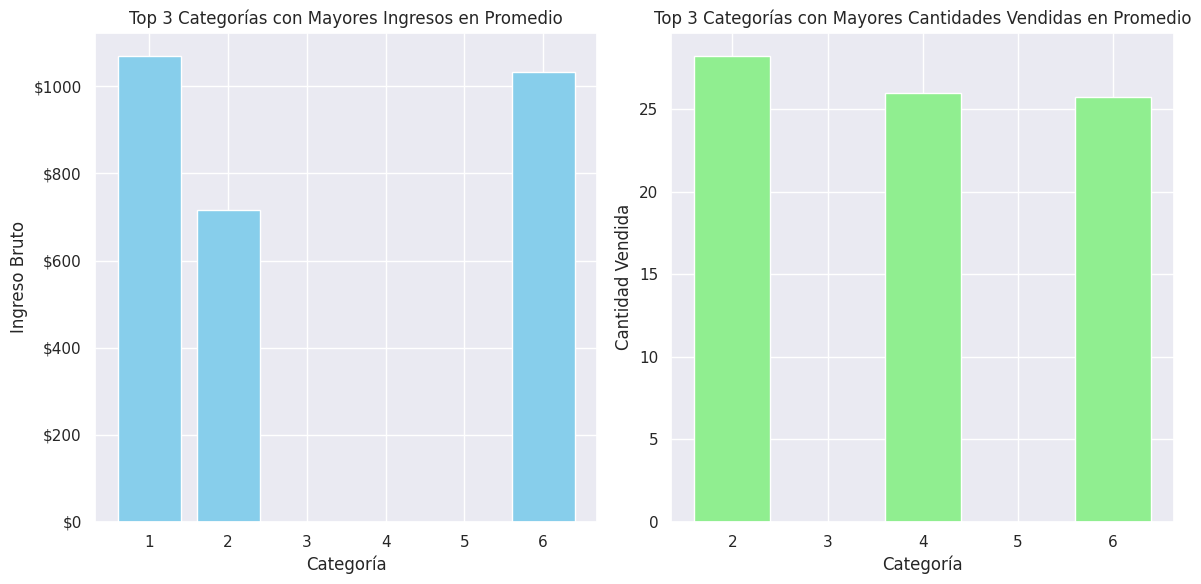

In [253]:
import seaborn as sns
import matplotlib.pyplot as plt

# Ordenar por ingreso bruto en orden descendente para obtener el top 3 de categorías con mayores ingresos en promedio
top_3_prom_ingresos_altos = promedio_por_categoria.sort_values(by='ingreso_bruto', ascending=False).head(3)

# Ordenar por cantidad vendida en orden descendente para obtener el top 3 de categorías con mayores cantidades vendidas en promedio
top_3_prom_quantity_altos = promedio_por_categoria.sort_values(by='quantity', ascending=False).head(3)




# Crear subplots para mostrar dos gráficos uno al lado del otro
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

# Gráfico de barras para los top 3 de categorías con mayores ingresos en promedio
axes[0].bar(top_3_prom_ingresos_altos.index, top_3_prom_ingresos_altos['ingreso_bruto'], color='skyblue')
axes[0].set_title('Top 3 Categorías con Mayores Ingresos en Promedio')
axes[0].set_xlabel('Categoría')
axes[0].set_ylabel('Ingreso Bruto')
axes[0].get_yaxis().set_major_formatter('${:.0f}'.format)  # Agregar el formato de dólares

# Gráfico de barras para los top 3 de categorías con mayores cantidades vendidas en promedio
axes[1].bar(top_3_prom_quantity_altos.index, top_3_prom_quantity_altos['quantity'], color='lightgreen')
axes[1].set_title('Top 3 Categorías con Mayores Cantidades Vendidas en Promedio')
axes[1].set_xlabel('Categoría')
axes[1].set_ylabel('Cantidad Vendida')

# Ajustar el diseño de los subplots
plt.tight_layout()

# Mostrar los gráficos
plt.show()


In [254]:
top_3_prom_quantity_altos

,quantity,ingreso_bruto
categoryid,,
2,28.22449,715.746939
4,26.01000,699.210000
6,25.76000,1033.530400


En esta parte, estamos haciendo un análisis interesante de nuestras categorías de productos. Primero, ordenamos nuestros datos para encontrar las categorías que nos están dando los mayores ingresos en promedio y las mayores cantidades vendidas en promedio.

Luego, queremos saber cuáles son las categorías que nos están generando los menores ingresos en promedio y las menores cantidades vendidas en promedio.

Creamos cuatro gráficos de barras en total, colocando dos en cada fila para mantener las cosas organizadas. Cada gráfico muestra información sobre las categorías y sus ingresos o cantidades vendidas.

En el primer gráfico, tenemos las tres categorías con los mayores ingresos promedio, representadas por barras azules. En el segundo gráfico, mostramos las tres categorías con las mayores cantidades vendidas promedio, con barras verdes.

Para el tercer gráfico, nos enfocamos en las categorías con los menores ingresos promedio, que están representadas por barras negras. Y finalmente, en el cuarto gráfico, vemos las categorías con las menores cantidades vendidas promedio, con barras rojas.

Todo está diseñado para ser fácil de entender y visualmente atractivo. ¡Esperamos obtener información útil sobre cómo nuestras categorías de productos están funcionando!

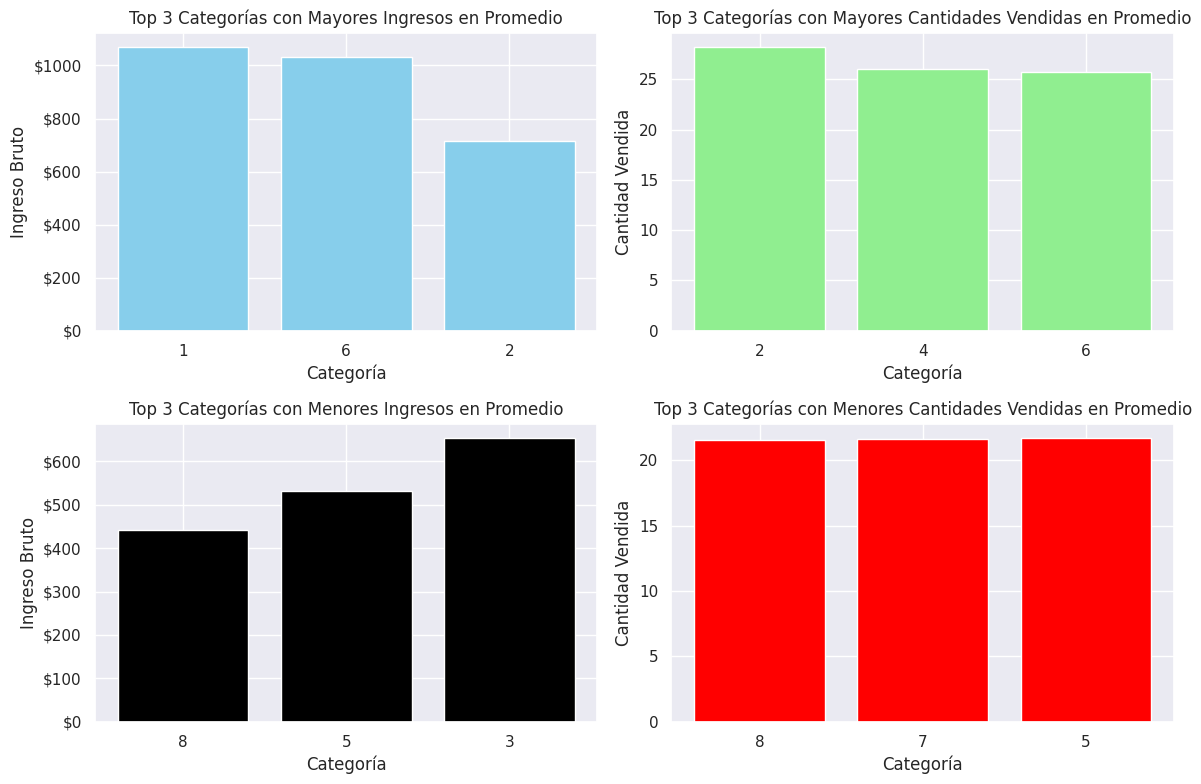

In [255]:
import seaborn as sns
import matplotlib.pyplot as plt

# Ordenar por ingreso bruto en orden descendente para obtener el top 3 de categorías con mayores ingresos en promedio
top_3_prom_ingresos_altos = promedio_por_categoria.sort_values(by='ingreso_bruto', ascending=False).head(3)

# Ordenar por cantidad vendida en orden descendente para obtener el top 3 de categorías con mayores cantidades vendidas en promedio
top_3_prom_quantity_altos = promedio_por_categoria.sort_values(by='quantity', ascending=False).head(3)

# Ordenar por ingreso bruto en orden ascendente para obtener el top 5 de productos con menores ingresos
top_3_prom_ingresos_bajos = promedio_por_categoria.sort_values(by='ingreso_bruto', ascending=True).head(3) # descendente o sea de mayor a menor
top_3_prom_quantity_bajos = promedio_por_categoria.sort_values(by='quantity', ascending=True).head(3)

# Crear subplots para mostrar dos gráficos uno al lado del otro
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))

# Gráfico de barras para los top 3 de categorías con mayores ingresos en promedio
axes[0, 0].bar(range(len(top_3_prom_ingresos_altos)), top_3_prom_ingresos_altos['ingreso_bruto'], color='skyblue')
axes[0, 0].set_title('Top 3 Categorías con Mayores Ingresos en Promedio')
axes[0, 0].set_xlabel('Categoría')
axes[0, 0].set_ylabel('Ingreso Bruto')
axes[0, 0].set_xticks(range(len(top_3_prom_ingresos_altos)))  # Establecer las ubicaciones de las etiquetas del eje x
axes[0, 0].set_xticklabels(top_3_prom_ingresos_altos.index)  # Establecer las etiquetas del eje x
axes[0, 0].get_yaxis().set_major_formatter('${:.0f}'.format)  # Agregar el formato de dólares

# Gráfico de barras para los top 3 de categorías con mayores cantidades vendidas en promedio
axes[0, 1].bar(range(len(top_3_prom_quantity_altos)), top_3_prom_quantity_altos['quantity'], color='lightgreen')
axes[0, 1].set_title('Top 3 Categorías con Mayores Cantidades Vendidas en Promedio')
axes[0, 1].set_xlabel('Categoría')
axes[0, 1].set_ylabel('Cantidad Vendida')
axes[0, 1].set_xticks(range(len(top_3_prom_quantity_altos)))  # Establecer las ubicaciones de las etiquetas del eje x
axes[0, 1].set_xticklabels(top_3_prom_quantity_altos.index)  # Establecer las etiquetas del eje x

# Gráfico de barras para los top 3 de categorías con mayores ingresos en promedio
axes[1, 0].bar(range(len(top_3_prom_ingresos_bajos)), top_3_prom_ingresos_bajos['ingreso_bruto'], color='black')
axes[1, 0].set_title('Top 3 Categorías con Menores Ingresos en Promedio')
axes[1, 0].set_xlabel('Categoría')
axes[1, 0].set_ylabel('Ingreso Bruto')
axes[1, 0].set_xticks(range(len(top_3_prom_ingresos_bajos)))  # Establecer las ubicaciones de las etiquetas del eje x
axes[1, 0].set_xticklabels(top_3_prom_ingresos_bajos.index)  # Establecer las etiquetas del eje x
axes[1, 0].get_yaxis().set_major_formatter('${:.0f}'.format)  # Agregar el formato de dólares

# Gráfico de barras para los top 3 de categorías con mayores cantidades vendidas en promedio
axes[1, 1].bar(range(len(top_3_prom_quantity_bajos)), top_3_prom_quantity_bajos['quantity'], color='red')
axes[1, 1].set_title('Top 3 Categorías con Menores Cantidades Vendidas en Promedio')
axes[1, 1].set_xlabel('Categoría')
axes[1, 1].set_ylabel('Cantidad Vendida')
axes[1, 1].set_xticks(range(len(top_3_prom_quantity_bajos)))  # Establecer las ubicaciones de las etiquetas del eje x
axes[1, 1].set_xticklabels(top_3_prom_quantity_bajos.index)  # Establecer las etiquetas del eje x

# Ajustar el diseño de los subplots
plt.tight_layout()

# Mostrar los gráficos
plt.show()

#analisis de categorias de productos hecho


In [256]:
"""
Análisis de Precios:

Calcula estadísticas descriptivas para la columna price, como el precio promedio, la mediana, el mínimo y el máximo.
Visualiza la distribución de los precios con un histograma
"""

#lo transformamos a tipo float para un mejor analisis
df_sales["price"] = df_sales["price"].astype(float)

In [257]:
df_sales["price"].info()

<class 'pandas.core.series.Series'>
Int64Index: 518 entries, 0 to 517
Series name: price
Non-Null Count  Dtype  
--------------  -----  
518 non-null    float64
dtypes: float64(1)
memory usage: 8.1 KB


In [258]:
df_sales["price"].describe()

count    518.000000
mean      29.209208
std       33.897609
min        2.500000
25%       13.000000
50%       20.000000
75%       34.800000
max      263.500000
Name: price, dtype: float64

Estadísticas descriptivas para la columna price:
count    518.000000
mean      29.209208
std       33.897609
min        2.500000
25%       13.000000
50%       20.000000
75%       34.800000
max      263.500000
Name: price, dtype: float64


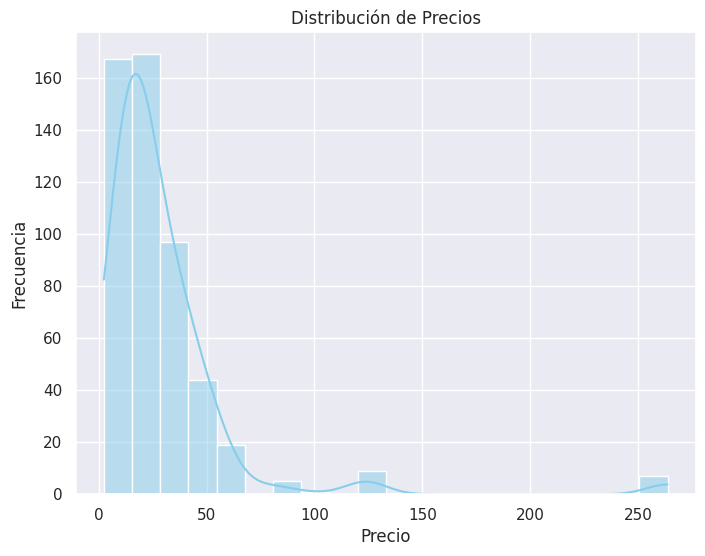

In [259]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Suponiendo que df_sales es tu DataFrame

# Calcula estadísticas descriptivas para la columna price
price_stats = df_sales["price"].describe()

# Imprime las estadísticas descriptivas
print("Estadísticas descriptivas para la columna price:")
print(price_stats)

# Visualiza la distribución de los precios con un histograma
plt.figure(figsize=(8, 6))
sns.histplot(data=df_sales, x="price", bins=20, kde=True, color='skyblue')
plt.title("Distribución de Precios")
plt.xlabel("Precio")
plt.ylabel("Frecuencia")

plt.show()

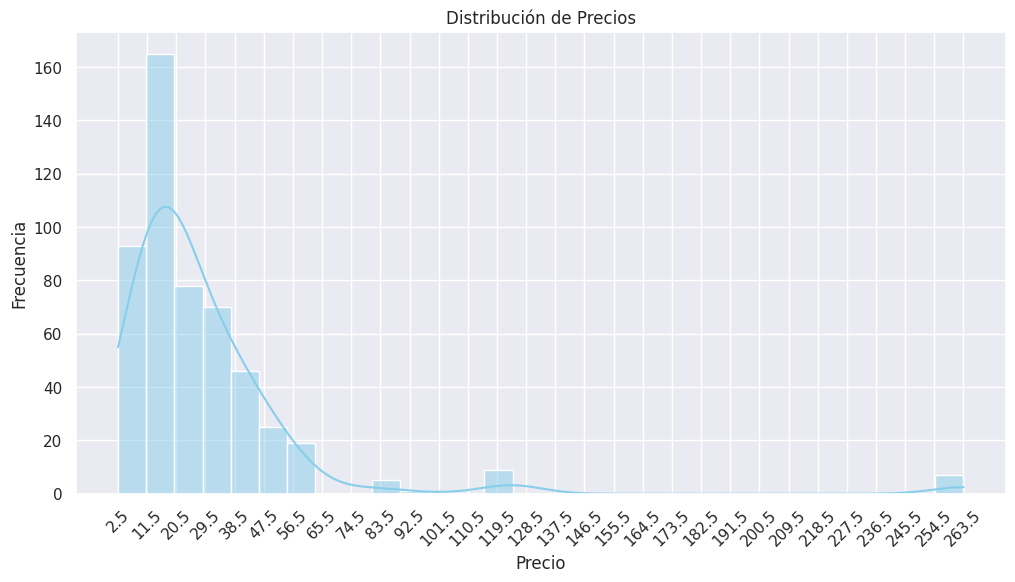

In [260]:
import numpy as np

# Calcula el rango de los precios
price_min = df_sales["price"].min()
price_max = df_sales["price"].max()

# Calcula estadísticas descriptivas para la columna price
price_stats = df_sales["price"].describe()

# Calcula el número de divisiones (bins) para el histograma
num_bins = 30  # Puedes ajustar este valor según tu preferencia

# Visualiza la distribución de los precios con un histograma
plt.figure(figsize=(12, 6))
sns.histplot(data=df_sales, x="price", bins=num_bins, kde=True, color='skyblue')
plt.title("Distribución de Precios")
plt.xlabel("Precio")
plt.ylabel("Frecuencia")

# Establece los ticks del eje x para que haya más valores representados
plt.xticks(np.linspace(price_min, price_max, num=num_bins), rotation=45)

plt.show()


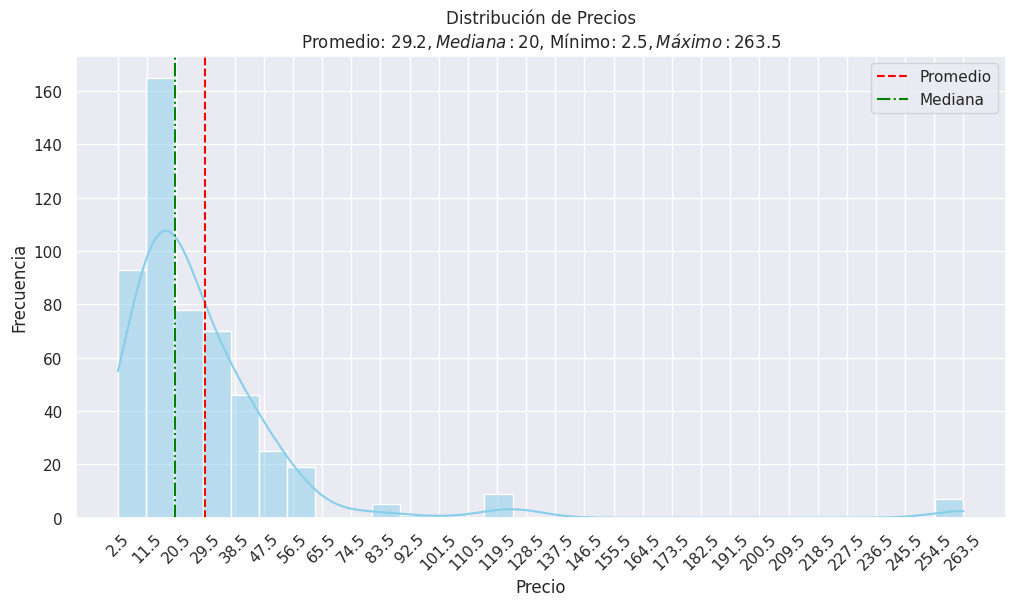

In [261]:
import numpy as np

# Calcula el rango de los precios
price_min = df_sales["price"].min()
price_max = df_sales["price"].max()

# Calcula estadísticas descriptivas para la columna price
price_stats = df_sales["price"].describe()

# Calcula el número de divisiones (bins) para el histograma
num_bins = 30  # Puedes ajustar este valor según tu preferencia

# Visualiza la distribución de los precios con un histograma
plt.figure(figsize=(12, 6))
sns.histplot(data=df_sales, x="price", bins=num_bins, kde=True, color='skyblue')
plt.title("Distribución de Precios\n" +
          f"Promedio: ${price_stats['mean']:.1f}, Mediana: ${price_stats['50%']:.0f}, Mínimo: ${price_min:.1f}, Máximo: ${price_max:.1f}")
plt.xlabel("Precio")
plt.ylabel("Frecuencia")


# Establece los ticks del eje x para que haya más valores representados
plt.xticks(np.linspace(price_min, price_max, num=num_bins), rotation=45)

# Agrega líneas verticales para el precio promedio y la mediana
plt.axvline(x=price_stats['mean'], color='red', linestyle='--', label='Promedio')
plt.axvline(x=price_stats['50%'], color='green', linestyle='-.', label='Mediana')

plt.legend()

plt.show()


En esta sección, te voy a explicar cómo puedes interpretar el histograma de precios y cómo la función `.describe()` te proporciona un resumen estadístico de tus datos.

1. **Frecuencia vs. Precios:** El histograma de precios te muestra la frecuencia de ocurrencia de diferentes precios. Puedes observar cómo varía la frecuencia en función de los precios, lo que te dará una idea de la distribución de los precios en tus datos. Por ejemplo, ¿los precios tienden a agruparse alrededor de ciertos valores o están más dispersos?

2. **Forma de la Distribución:** Observa la forma general del histograma. ¿Es simétrico o sesgado hacia algún lado? ¿Tiene una forma de campana (distribución normal) o es asimétrico? Esto te ayudará a entender la forma en que están distribuidos los precios en tus datos.

3. **Centro y Dispersión:** Examina dónde se concentran los precios más frecuentes (el pico del histograma) y cuál es la dispersión de los precios alrededor de este centro. Esto te dará una idea de la dispersión de los datos y la variabilidad de los precios.

4. **Outliers:** Busca valores extremos en los precios que estén muy alejados del resto de los datos. Estos pueden aparecer como barras solitarias en los extremos del histograma. Los outliers pueden ser indicativos de datos atípicos o errores en la recolección de datos.

5. **Interpretación del eje x:** Recuerda que en el eje x están los precios. Por lo tanto, cuanto más a la derecha esté un valor en el eje x, mayor será el precio que representa. Esto te ayudará a entender la escala de los precios representados en el histograma.

En cuanto a la función `.describe()`, proporciona un resumen estadístico de una serie de datos numéricos en un DataFrame de Pandas. Te da información sobre la cantidad de observaciones, la media, la desviación estándar, los percentiles y los valores mínimo y máximo de la serie. Estos estadísticos te ayudan a comprender la distribución y la dispersión de los datos en la serie.

¡Espero que esto te ayude a entender mejor tus datos y a realizar un análisis más profundo de tus precios!

# analisis de provedores :

Análisis de Proveedores:

Examina la coumna supplierid para identificar los proveedores más frecuentes o aquellos que generan más ingreso

es útil analizar los proveedores que generan más ingresos, ya que puede proporcionar información valiosa sobre las relaciones comerciales más rentables y ayudar a identificar áreas de oportunidad para optimizar la cadena de suministro o negociar mejores condiciones con proveedores clave.

Al examinar la columna ''supplierid'' y analizar los proveedores más frecuentes o los que generan más ingresos, puedes identificar patrones en el rendimiento de los proveedores y tomar decisiones informadas sobre cómo mejorar la eficiencia y la rentabilidad de las operaciones comercialess.

In [262]:
df_sales.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 518 entries, 0 to 517
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0_x   518 non-null    int64  
 1   orderdetailid  518 non-null    int64  
 2   orderid        518 non-null    int64  
 3   productid      518 non-null    int64  
 4   quantity       518 non-null    int64  
 5   Unnamed: 0_y   518 non-null    int64  
 6   productname    518 non-null    object 
 7   supplierid     518 non-null    int64  
 8   categoryid     518 non-null    int64  
 9   unit           518 non-null    object 
 10  price          518 non-null    float64
 11  ingreso_bruto  518 non-null    float64
dtypes: float64(2), int64(8), object(2)
memory usage: 52.6+ KB


In [263]:
import pandas as pd

# Calcula el ingreso bruto total por proveedor
ingreso_bruto_por_proveedor = df_sales.groupby('supplierid')['ingreso_bruto'].sum()

""" ¿groupby? -->
groupby('supplierid'): Agrupa los datos por el identificador del proveedor (supplierid),
lo que significa que los datos se dividirán en grupos basados en los valores únicos de la columna supplierid. <--
"""


# Ordena los proveedores por ingreso bruto en orden descendente (mayor a menor)
ingreso_bruto_por_proveedor = ingreso_bruto_por_proveedor.sort_values(ascending=False)

# Muestra los proveedores que generan más ingresos
top_proveedores = ingreso_bruto_por_proveedor.head(5)
print("Top 5 Proveedores que generan más ingresos:")
print(top_proveedores)


Top 5 Proveedores que generan más ingresos:
supplierid
18    67764.50
12    37487.87
7     37067.20
28    33650.00
29    19043.50
Name: ingreso_bruto, dtype: float64


In [264]:
top_proveedores

supplierid
18    67764.50
12    37487.87
7     37067.20
28    33650.00
29    19043.50
Name: ingreso_bruto, dtype: float64

En esta parte, estamos haciendo algo con nuestros datos de proveedores y sus ingresos brutos. Primero, tenemos algunos datos de ejemplo que representan los ingresos brutos de cinco proveedores diferentes.

Luego, creamos un gráfico de dona para visualizar estos datos. La dona está dividida en sectores que representan los ingresos brutos de cada proveedor como porcentaje del total.

Cada sector de la dona está etiquetado con el nombre del proveedor y el porcentaje de ingresos brutos que representa. Las etiquetas están colocadas de manera que sean fáciles de leer y están anotadas con la cantidad correspondiente de ingresos brutos.

¡Y eso es todo! Mostramos nuestro gráfico de dona para que podamos entender rápidamente cómo se comparan los ingresos brutos entre nuestros proveedores.

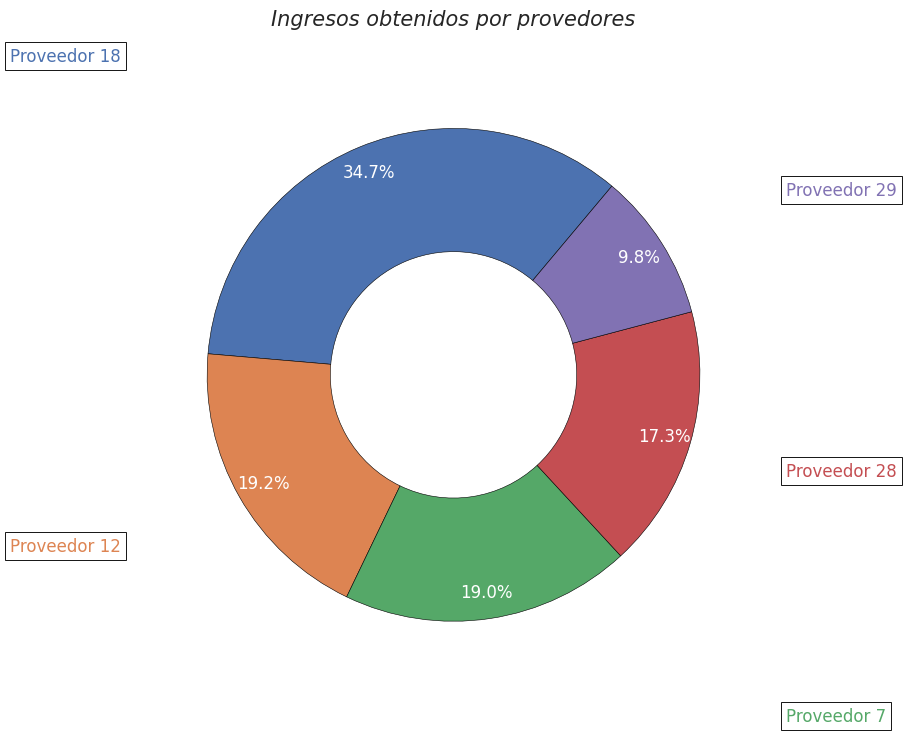

In [265]:
import matplotlib.pyplot as plt
import numpy as np

# Datos de ejemplo para los proveedores y sus ingresos brutos
supplier_ids = [18, 12, 7, 28, 29]
ingresos_brutos = [67764.5, 37487.87, 37067.20, 33650, 19043.5]

# Ajustar el tamaño de la figura
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(aspect="equal"))

# Configurar los datos para la dona
labels = [f"Proveedor {supplier_id}" for supplier_id in supplier_ids]
sizes = ingresos_brutos

# Graficar la dona
wedges, texts, autotexts = ax.pie(sizes, autopct='%1.1f%%', textprops=dict(color="w"), startangle=50,
                                  wedgeprops=dict(width=0.5, linewidth=0.4, edgecolor='black'), pctdistance=0.89)

# Configurar propiedades de las etiquetas
bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
kw = dict(arrowprops=dict(arrowstyle="-"), bbox=bbox_props, zorder=0, va="center")

# Anotar las etiquetas con el porcentaje de ingresos brutos
for i, (p, label) in enumerate(zip(wedges, labels)):
    ang = (p.theta2 - p.theta1) / 2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = f"angle,angleA=0,angleB={ang}"
    kw["arrowprops"].update({"connectionstyle": connectionstyle})

    # Ajustar la posición de las etiquetas y usar color de texto automático
    ax.annotate(label, xy=(x, y), xytext=(1.35 * np.sign(x), 1.4 * y),
                horizontalalignment=horizontalalignment, **kw, color=p.get_facecolor())

# Mostrar la gráfica
plt.title("Ingresos obtenidos por provedores", style = "italic", fontsize = 15,pad = 30) # con pad o padding podemos "desplazar" el objeto
#plt.title('Título del gráfico en cursiva', )
plt.show()


# Comenzamos con los algoritmos basdicos de ML
en este caso usaremos sklearn dada la simplicidad del proyecto, usariamos tensorflow en caso de necesitar algoritmos mas complejos y orientados mas hacia la utilidad del deeplearning.

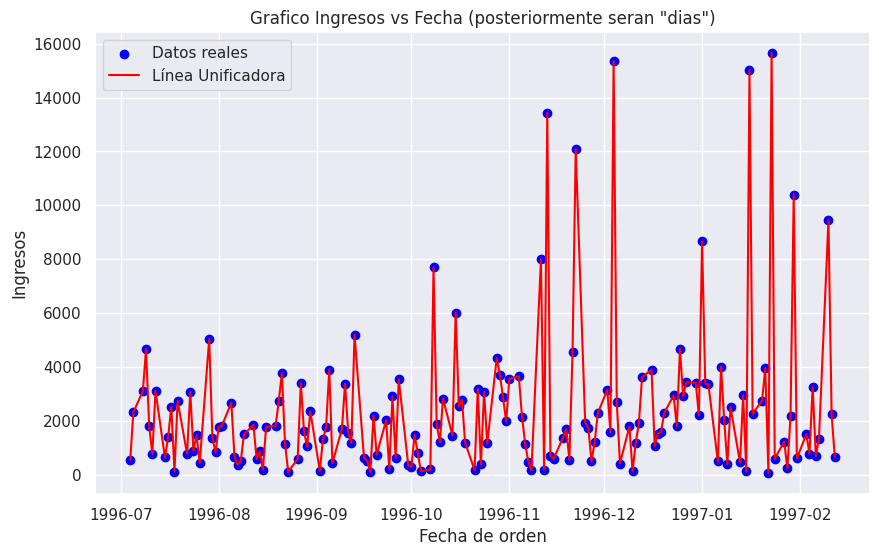

In [291]:
plt.figure(figsize=(10, 6))
plt.scatter(daily_revenue['orderdate'], daily_revenue['Ingresos'], color='blue', label='Datos reales')
plt.plot(daily_revenue['orderdate'], daily_revenue['Ingresos'], color='red', label='Línea Unificadora')
plt.xlabel('Fecha de orden')
plt.ylabel('Ingresos')
plt.title('Grafico Ingresos vs Fecha (posteriormente seran "dias")')
plt.legend()
plt.grid(True)
plt.show()

In [267]:
daily_revenue.head()

,orderdate,Ingresos,day_of_week
0,1996-07-04,566.00,3
1,1996-07-05,2329.25,4
2,1996-07-08,3106.75,0
3,1996-07-09,4662.50,1
4,1996-07-10,1806.00,2


In [268]:
daily_revenue['indice'] = daily_revenue.index

In [269]:
daily_revenue

,orderdate,Ingresos,day_of_week,indice
0,1996-07-04,566.00,3,0
1,1996-07-05,2329.25,4,1
2,1996-07-08,3106.75,0,2
3,1996-07-09,4662.50,1,3
4,1996-07-10,1806.00,2,4
...,...,...,...,...
155,1997-02-06,710.50,3,155
156,1997-02-07,1348.70,4,156
157,1997-02-10,9441.01,0,157
158,1997-02-11,2246.00,1,158


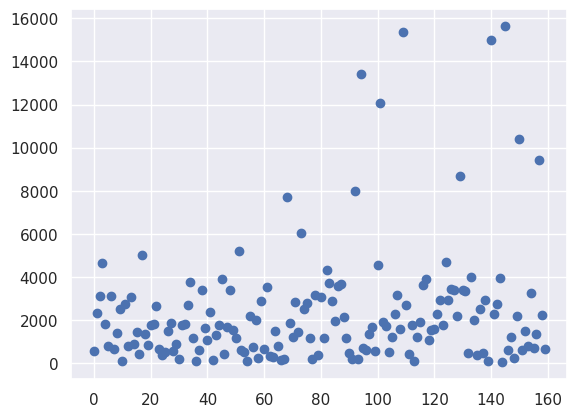

In [270]:
# 'indice' = día
plt.scatter(daily_revenue['indice'],daily_revenue['Ingresos'])

In [271]:
import tensorflow as tf

In [272]:
# Obtener el número de filas en el DataFrame
total_rows = daily_revenue.shape[0] # Resultado/ 160

# Definir el tamaño del conjunto de entrenamiento (por ejemplo, 80%)
train_size = 0.8

# Calcular el número de filas para el conjunto de entrenamiento
train_rows = int(total_rows * train_size)

# Dividir el DataFrame en conjuntos de entrenamiento y prueba
train_df = daily_revenue.iloc[:train_rows] # seleccionamos las primeras n filas
test_df = daily_revenue.iloc[train_rows:] # de esas n filas en adelante, hasta el final

# Verificar las dimensiones de los conjuntos de entrenamiento y prueba
print("Dimensiones del conjunto de entrenamiento:", train_df.shape)
print("Dimensiones del conjunto de prueba:", test_df.shape)

#posteriormente dividimos los datos de train_size, para obtener datos de validacion.

Dimensiones del conjunto de entrenamiento: (128, 4)
Dimensiones del conjunto de prueba: (32, 4)


In [273]:
test_df

,orderdate,Ingresos,day_of_week,indice
128,1996-12-31,2207.00,1,128
129,1997-01-01,8666.61,2,129
130,1997-01-02,3393.50,3,130
131,1997-01-03,3355.85,4,131
132,1997-01-06,500.00,0,132
133,1997-01-07,4019.50,1,133
134,1997-01-08,2030.20,2,134
135,1997-01-09,399.00,3,135
136,1997-01-10,2516.75,4,136
137,1997-01-13,465.00,0,137


# definimos funciones para construir y entrenar el modelo

In [274]:
#@title Define the functions that build and train a model
def build_model(my_learning_rate):
  """Create and compile a simple linear regression model."""
  # el modelo mas simple de keras, el secuencial
  model = tf.keras.models.Sequential()

  # especificamos en el modelo un nodo y una capa
  model.add(tf.keras.layers.Dense(units=1, input_shape=(1,)))

    #especificamos el modelo para optimizar, en nuestro cazo usaremos MSE (mean squared error)
  model.compile(optimizer=tf.keras.optimizers.experimental.RMSprop(learning_rate=my_learning_rate),
                loss="mean_squared_error",
                metrics=[tf.keras.metrics.RootMeanSquaredError()])

  return model


#funcion para entrenar al modelo
def train_model(model, df, feature, label, my_epochs,
                my_batch_size=None, my_validation_split=0.1):
  """alimentamos al modelo con los datos """

  history = model.fit(x=df[feature],
                      y=df[label],
                      batch_size=my_batch_size,
                      epochs=my_epochs,
                      validation_split=my_validation_split) ## fin del pipeline

  # especificamos peso y tamaño de los sesgos
  trained_weight = model.get_weights()[0]  # Obtiene los pesos entrenados del modelo.
  trained_bias = model.get_weights()[1]    # Obtiene los sesgos entrenados del modelo.

  # epocas
  epochs = history.epoch  # Guarda la lista de épocas por separado del resto del historial.

  hist = pd.DataFrame(history.history)     # Crea un DataFrame con el historial de entrenamiento del modelo.
  rmse = hist["root_mean_squared_error"]   # Aísla el error cuadrático medio para cada época.

  return epochs, rmse, history.history

print("definimos los modelos, el de construccion y el de entrenamiento del mismo")

definimos los modelos, el de construccion y el de entrenamiento del mismo


In [275]:
#dibujaremos la curva de perdida, a partir de acá lo dejaremos en ingles.
def plot_the_loss_curve(epochs, mae_training, mae_validation):
  """Plot a curve of loss vs. epoch."""
  plt.figure()
  plt.xlabel("Epoch")
  plt.ylabel("Root Mean Squared Error")

  plt.plot(epochs[1:], mae_training[1:], label="Training Loss")
  plt.plot(epochs[1:], mae_validation[1:], label="Validation Loss")
  plt.legend()

  merged_mae_lists = mae_training[1:] + mae_validation[1:]
  highest_loss = max(merged_mae_lists)
  lowest_loss = min(merged_mae_lists)
  delta = highest_loss - lowest_loss
  print(delta)

  top_of_y_axis = highest_loss + (delta * 0.05)
  bottom_of_y_axis = lowest_loss - (delta * 0.05)

  plt.ylim([bottom_of_y_axis, top_of_y_axis])
  plt.show()

print("Defined the plot_the_loss_curve function.")

Defined the plot_the_loss_curve function.


In [276]:
daily_revenue.head()

,orderdate,Ingresos,day_of_week,indice
0,1996-07-04,566.00,3,0
1,1996-07-05,2329.25,4,1
2,1996-07-08,3106.75,0,2
3,1996-07-09,4662.50,1,3
4,1996-07-10,1806.00,2,4


In [277]:
train_df

,orderdate,Ingresos,day_of_week,indice
0,1996-07-04,566.00,3,0
1,1996-07-05,2329.25,4,1
2,1996-07-08,3106.75,0,2
3,1996-07-09,4662.50,1,3
4,1996-07-10,1806.00,2,4
...,...,...,...,...
123,1996-12-24,1800.00,1,123
124,1996-12-25,4688.60,2,124
125,1996-12-26,2920.00,3,125
126,1996-12-27,3434.80,4,126


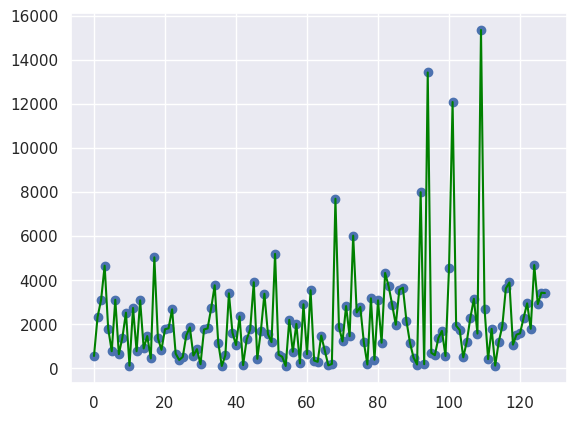

In [278]:
# es lo mismo que hicemos anteriormente
# en la parte donde aclaramos "indice = día"
plt.scatter(train_df.index, train_df['Ingresos'])
plt.plot(train_df.index, train_df['Ingresos'], color = "green")

In [279]:
train_df

,orderdate,Ingresos,day_of_week,indice
0,1996-07-04,566.00,3,0
1,1996-07-05,2329.25,4,1
2,1996-07-08,3106.75,0,2
3,1996-07-09,4662.50,1,3
4,1996-07-10,1806.00,2,4
...,...,...,...,...
123,1996-12-24,1800.00,1,123
124,1996-12-25,4688.60,2,124
125,1996-12-26,2920.00,3,125
126,1996-12-27,3434.80,4,126


Epoch 1/200
2/2 [==============================] - 1s 276ms/step - loss: 9117203.0000 - root_mean_squared_error: 3019.4707 - val_loss: 14785557.0000 - val_root_mean_squared_error: 3845.1992
Epoch 2/200
2/2 [==============================] - 0s 53ms/step - loss: 9060851.0000 - root_mean_squared_error: 3010.1245 - val_loss: 14683716.0000 - val_root_mean_squared_error: 3831.9336
Epoch 3/200
2/2 [==============================] - 0s 80ms/step - loss: 9021030.0000 - root_mean_squared_error: 3003.5029 - val_loss: 14598417.0000 - val_root_mean_squared_error: 3820.7876
Epoch 4/200
2/2 [==============================] - 0s 62ms/step - loss: 8987475.0000 - root_mean_squared_error: 2997.9119 - val_loss: 14522246.0000 - val_root_mean_squared_error: 3810.8064
Epoch 5/200
2/2 [==============================] - 0s 51ms/step - loss: 8957617.0000 - root_mean_squared_error: 2992.9277 - val_loss: 14456060.0000 - val_root_mean_squared_error: 3802.1125
Epoch 6/200
2/2 [==============================] - 0s 

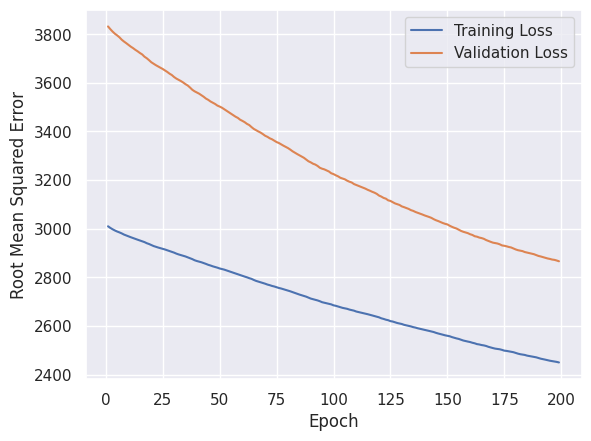

In [287]:
# al ser una serie temporal no barajaremos los datos en este caso :

# Las siguientes variables son los hiperparámetros.
learning_rate = 0.045
epochs = 200
batch_size = 91 # tamaño del lote

# Dividir el conjunto de entrenamiento original en un conjunto de entrenamiento reducido y un
# conjunto de validación.
validation_split = 0.2

# Identificar la característica y la etiqueta.
my_feature = "indice" #traducido como: ingreso_medio    # el ingreso medio en un bloque de la ciudad específico.
my_label = "Ingresos" # el valor promedio de la casa en un bloque de la ciudad específico.
# Es decir, vas a crear un modelo que predice el valor de la casa basado
# únicamente en el ingreso medio del vecindario.

# Invocar las funciones para construir y entrenar el modelo.
my_model = build_model(learning_rate)
epochs, rmse, history = train_model(my_model, train_df, my_feature,
                                    my_label, epochs, batch_size,
                                    validation_split)

plot_the_loss_curve(epochs, history["root_mean_squared_error"],
                    history["val_root_mean_squared_error"])

### acá es donde esto se vuelve un "arte" mas que ciencia

ahora viene el problema de optimizar correctamente los hiperparamertos del modelo lo que estoy haciendo es ir incrementando gradualmente el numero de epocas, bajar la cantidad de lote, y disminuir la tasa de aprendisaje.

Así voy obteniendo de apoco una reduccion cada vez mas pronunciada, y lo que busco es que el modelo generalice bien o lo mejor posible.

Siendo el juez final los datos "test_df"

Imagen de ej.

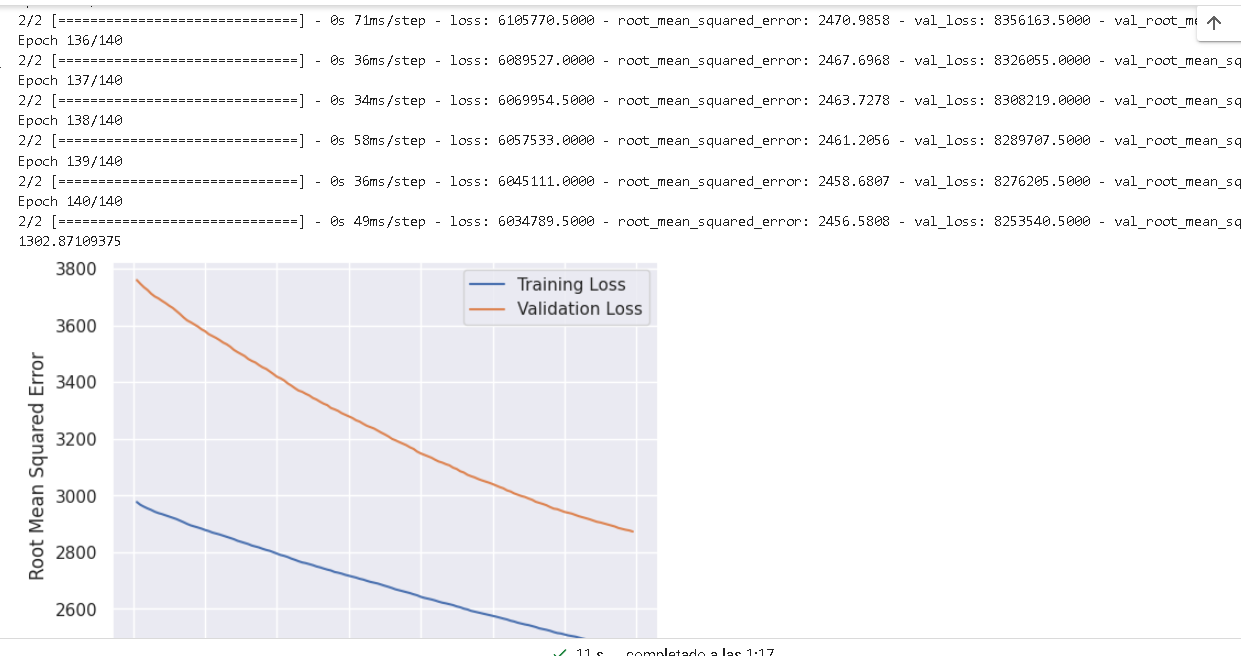

## luego de muchas pruebas me encuentro que estos son los hyperparametros optimos
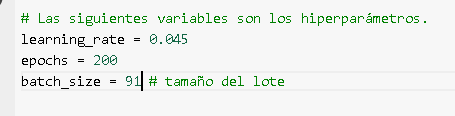

### aunque para mejorar aun mas el modelo (no recomendado para analisis de series temporales) podemos barajar los datos y mejorar la generalizacion de este, es decir, su valor predictivo real ante datos entrantes nuevos.

Epoch 1/200
2/2 [==============================] - 1s 337ms/step - loss: 9432525.0000 - root_mean_squared_error: 3071.2417 - val_loss: 12097986.0000 - val_root_mean_squared_error: 3478.2158
Epoch 2/200
2/2 [==============================] - 0s 68ms/step - loss: 9358962.0000 - root_mean_squared_error: 3059.2419 - val_loss: 12058511.0000 - val_root_mean_squared_error: 3472.5366
Epoch 3/200
2/2 [==============================] - 0s 56ms/step - loss: 9315431.0000 - root_mean_squared_error: 3052.1191 - val_loss: 12010082.0000 - val_root_mean_squared_error: 3465.5566
Epoch 4/200
2/2 [==============================] - 0s 73ms/step - loss: 9266102.0000 - root_mean_squared_error: 3044.0273 - val_loss: 11974889.0000 - val_root_mean_squared_error: 3460.4753
Epoch 5/200
2/2 [==============================] - 0s 69ms/step - loss: 9230394.0000 - root_mean_squared_error: 3038.1562 - val_loss: 11949790.0000 - val_root_mean_squared_error: 3456.8469
Epoch 6/200
2/2 [==============================] - 0s 

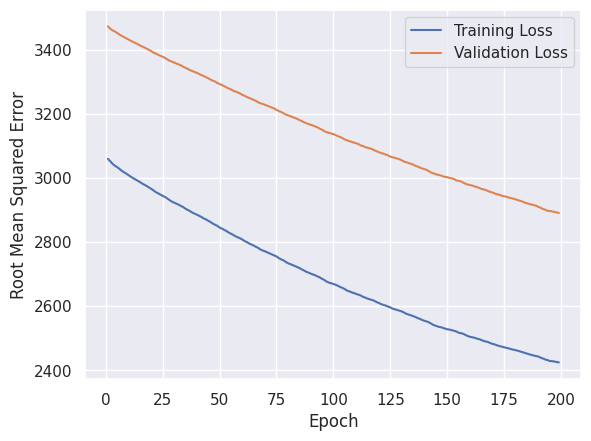

' #PORQUE BARAJAMOS LOS DATOS DE ENTRANAMIENTO DEL MODELO  :  en resumen para obtener resultados ma sy mejor generalizados porque asi el modelo no aprende de sesgos\n\nBarajar los ejemplos en el conjunto de entrenamiento es importante porque garantiza que el modelo no aprenda\nningún sesgo basado en el orden de los datos de entrenamiento. Cuando los datos están ordenados de cierta manera,\n el modelo puede aprender patrones específicos relacionados con ese orden, lo cual no es representativo de la distribución\n general de los datos. Al barajar los ejemplos, garantizamos que el modelo se expone a una variedad de ejemplos en cada época\n de entrenamiento, lo que ayuda a mejorar su capacidad para generalizar a nuevos datos. Esto es particularmente importante cuando se\n utiliza la validación cruzada o la validación dividida, ya que asegura que el conjunto de validación contenga una muestra aleatoria de\n los datos, lo que proporciona una evaluación más justa y precisa del rendimiento del

In [289]:
"""
En el contexto de este algoritmo de aprendizaje automático (AA), x se refiere a la característica (feature)
que se utilizará como entrada para el modelo, mientras que y se refiere a la etiqueta (label) que el modelo intentará predecir.

en resumen

x = feature = caracteristica
y = label = etiqueta
"""

#@title Haz doble clic para ver la implementación completa.

# Las siguientes variables son los hiperparámetros.
learning_rate = 0.045
epochs = 200
batch_size = 91 # tamaño de lote

# Dividir el conjunto de entrenamiento original en un conjunto de entrenamiento reducido y un
# conjunto de validación.
validation_split = 0.2 # dividimos y lo dejamos en un 20 %

# Identificar la característica y la etiqueta.
my_feature = "indice"    # el ingreso medio en un bloque de la ciudad específico. = eje X
my_label = "Ingresos" # el valor medio de la casa en un bloque de la ciudad específico. = eje Y
# Es decir, vas a crear un modelo que predice el valor de la casa basado
# únicamente en el ingreso medio del vecindario.

# Barajar los ejemplos.
shuffled_train_df = train_df.reindex(np.random.permutation(train_df.index))

# Invocar las funciones para construir y entrenar el modelo. Entrenar en el conjunto de
# entrenamiento barajado.
my_model = build_model(learning_rate)
epochs, rmse, history = train_model(my_model, shuffled_train_df, my_feature,
                                    my_label, epochs, batch_size,
                                    validation_split)

plot_the_loss_curve(epochs, history["root_mean_squared_error"],
                    history["val_root_mean_squared_error"])

""" #PORQUE BARAJAMOS LOS DATOS DE ENTRANAMIENTO DEL MODELO  :  en resumen para obtener resultados ma sy mejor generalizados porque asi el modelo no aprende de sesgos

Barajar los ejemplos en el conjunto de entrenamiento es importante porque garantiza que el modelo no aprenda
ningún sesgo basado en el orden de los datos de entrenamiento. Cuando los datos están ordenados de cierta manera,
 el modelo puede aprender patrones específicos relacionados con ese orden, lo cual no es representativo de la distribución
 general de los datos. Al barajar los ejemplos, garantizamos que el modelo se expone a una variedad de ejemplos en cada época
 de entrenamiento, lo que ayuda a mejorar su capacidad para generalizar a nuevos datos. Esto es particularmente importante cuando se
 utiliza la validación cruzada o la validación dividida, ya que asegura que el conjunto de validación contenga una muestra aleatoria de
 los datos, lo que proporciona una evaluación más justa y precisa del rendimiento del modelo.

"""

### pero al final mejoro la generalizacion del modelo ?
eso es lo que vamos a probar ahora, el valor predictivo en base a ver la similitud entre los diferentes valores del RMSE

In [290]:
x_test = test_df[my_feature]
y_test = test_df[my_label]

results = my_model.evaluate(x_test, y_test, batch_size=batch_size)

1/1 [==============================] - 0s 28ms/step - loss: 16861850.0000 - root_mean_squared_error: 4106.3184


los valores 'root_mean_squared_error' son similares ?? , NO y no son lo suficientemente similares por lo que no es recomendable el uso del modelo.



In [293]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

X= daily_revenue['indice']
y= daily_revenue['Ingresos']

# Convertir la columna en un array bidimensional
X = X.values.reshape(-1, 1)

# Suponiendo que X son tus características y y es tu etiqueta
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear el modelo de regresión lineal
model = LinearRegression()

# Entrenar el modelo
model.fit(X_train, y_train)

# Hacer predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Calcular el error cuadrático medio
mse = mean_squared_error(y_test, y_pred)

# Calcular el coeficiente de determinación (R cuadrado)
r2 = r2_score(y_test, y_pred)

print("Error cuadrático medio:", mse)
print("Coeficiente de determinación (R^2):", r2)


Error cuadrático medio: 8127932.405277665
Coeficiente de determinación (R^2): 0.04328254615068228


### una vez mas el problema esta en los datos, y es ahi donde deberemos de esforzarnos.

El Error Cuadrático Medio (MSE) es una medida que indica cuánto difieren, en promedio, las predicciones de nuestro modelo de los valores reales, pero elevado al cuadrado. En mi caso, un MSE relativamente alto sugiere que nuestras predicciones están bastante alejadas de los valores reales.

En resumen, el modelo no está haciendo predicciones precisas y debido a la naturaleza de los datos, tampoco es util para realizar predicciones dado a que no se demuestra alguna tendencia en particular.

El Coeficiente de Determinación (R^2) es una métrica que nos indica qué tan bien nuestro modelo se ajusta a los datos reales. Varía entre 0 y 1, donde 1 significa que nuestro modelo se ajusta perfectamente a los datos y 0 significa que nuestro modelo es tan bueno como simplemente predecir la media de los valores observados. En mi caso, un valor de R^2 bastante bajo, aproximadamente 0.043, sugiere que nuestro modelo no está explicando bien la variabilidad de los datos utilizando la característica que hemos proporcionado. En otras palabras, el modelo no está capturando adecuadamente la relación entre la característica que estamos utilizando y la variable que intentamos predecir.